### Movie Recommendation System
*Nuestro dataset seleccionado está compuesto por un extenso catálogo de películas que abarcan una amplia variedad de campos informativos, incluyendo valores numéricos como el promedio de votos, la cantidad de votos, el costo de producción, las ganancias, la popularidad y la duración en minutos. Además, se integran campos categóricos, como el género, así como campos de texto puro que detallan información sobre los protagonistas, las empresas productoras y enlaces web, entre muchas otras columnas.*

*Inicialmente, se planteó la ambiciosa tarea de utilizar este dataset para predecir o recomendar una serie de películas en función de las preferencias del usuario, posiblemente basadas en el género o sus gustos personales. Para llevar a cabo este objetivo, se consideró la posibilidad de incorporar un nuevo conjunto de datos a nuestra colección actual, enriqueciendo aún más la información disponible. Sin embargo, se determinó que esta tarea excedía la complejidad de un curso inicial de Data Science, por lo que se optó por un enfoque más realista y manejable.*

*Como resultado, nuestra variable objetivo principal se centrará en las ganancias (revenue). A través de técnicas de análisis de datos, buscaremos determinar de manera precisa y confiable las ganancias potenciales que una película podría generar, basándonos en los demás datos proporcionados en el dataset. Adicionalmente, consideraremos como una alternativa válida la variable "popularidad" (popularity), que nos brindará información sobre el nivel de aceptación y reconocimiento que podría obtener una película específica según los parámetros de entrada proporcionados por el usuario.*

*En el contexto de nuestro curso de Data Science, este dataset se convierte en una herramienta invaluable para la exploración y comprensión de conceptos fundamentales. A través de este proyecto, tendré la oportunidad de aplicar las técnicas y metodologías aprendidas en el aula a un escenario real y relevante. El análisis de datos sobre películas, centrándose en la predicción de ganancias y popularidad, me permitirá adquirir habilidades prácticas que son esenciales en el mundo del Data Science, como la limpieza de datos, la visualización y el modelado predictivo. Además, este enfoque me brindará una sólida base para enfrentar proyectos más avanzados en el futuro, consolidando su comprensión de los conceptos clave en este emocionante campo.*

# Librerias

In [60]:
# Comencemos importando nuestras librerias
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pd.options.display.float_format = '{:.2f}'.format

# Presentación DataSet

In [61]:
nueva_ruta = 'C:\\Users\\REYES LUIS\\Downloads\\cursos\\Curso Data Science CoderHouse\\DataSets\\Movie Recommendation System'
os.chdir(nueva_ruta)

# Levanto el archivo 
df = pd.read_csv("tmdb_5000_movies.csv",sep = ',')
# Reordenemos el dataframe
df = df[['id', 'budget', 'genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries',
                'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count']]
# Importamos el segundo archivo
df_2 = pd.read_csv("tmdb_5000_credits.csv",sep = ',')

#Unamos los dos dataframes
df = pd.merge(df, df_2, on="id", how="outer")

#Cambiemos el indice
df.index = df['id']
df = df.drop('id', axis='columns')

# Vamos algunos de sus datos
print(df.head())

           budget                                             genres  \
id                                                                     
19995   237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
285     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
206647  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
49026   250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
49529   260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            homepage  \
id                                                     
19995                    http://www.avatarmovie.com/   
285     http://disney.go.com/disneypictures/pirates/   
206647   http://www.sonypictures.com/movies/spectre/   
49026             http://www.thedarkknightrises.com/   
49529           http://movies.disney.com/john-carter   

                                                 keywords original_language  \
id                     

In [62]:
#Descripción de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 19995 to 25975
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [63]:
#Como podemos apreciar tenemos dos columnas con los mismos datos luego de la unión. Eliminemos una de ellas.
print(df[['title_x','title_y']].head())

                                         title_x  \
id                                                 
19995                                     Avatar   
285     Pirates of the Caribbean: At World's End   
206647                                   Spectre   
49026                      The Dark Knight Rises   
49529                                John Carter   

                                         title_y  
id                                                
19995                                     Avatar  
285     Pirates of the Caribbean: At World's End  
206647                                   Spectre  
49026                      The Dark Knight Rises  
49529                                John Carter  


In [64]:
#Eliminemos la columna repetida
df = df.drop(['title_y'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 19995 to 25975
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [65]:
#Veamos algunos datos generales de los campos númericos
print(df.describe())

            budget  popularity       revenue  runtime  vote_average  \
count      4803.00     4803.00       4803.00  4801.00       4803.00   
mean   29045039.88       21.49   82260638.65   106.88          6.09   
std    40722391.26       31.82  162857100.94    22.61          1.19   
min           0.00        0.00          0.00     0.00          0.00   
25%      790000.00        4.67          0.00    94.00          5.60   
50%    15000000.00       12.92   19170001.00   103.00          6.20   
75%    40000000.00       28.31   92917187.00   118.00          6.80   
max   380000000.00      875.58 2787965087.00   338.00         10.00   

       vote_count  
count     4803.00  
mean       690.22  
std       1234.59  
min          0.00  
25%         54.00  
50%        235.00  
75%        737.00  
max      13752.00  


# Missing Data

In [66]:
#Veamos cuantos campos en cero tenemos
nun_missing = (df[['budget','popularity','revenue','runtime','vote_average','vote_count']] == 0).sum()
print(nun_missing)

budget          1037
popularity         1
revenue         1427
runtime           35
vote_average      63
vote_count        62
dtype: int64


In [67]:
#Calculemos los promedios de los campos en cero y reemplacemos por este dichos campos
#Como nuestra variable target tiene muchos campos en cero vamos a omitir reemplazar por el promedio esta, y buscaremos 
#hacerlo por interpolación, lo mismo haremos para bugdet
promedios = df[['popularity','runtime','vote_average','vote_count']].mean()
print(promedios)

#Reemplacemos todos los campos en cero por NaN
df[['budget','popularity','revenue','runtime','vote_average','vote_count']] = df[['budget','popularity','revenue','runtime','vote_average','vote_count']].replace(0, np.nan)

df[['popularity','runtime','vote_average','vote_count']] = df[['popularity','runtime','vote_average','vote_count']].fillna(promedios)

nun_missing = (df[['budget','popularity','revenue','runtime','vote_average','vote_count']] == 0).sum()
print(nun_missing)

popularity      21.49
runtime        106.88
vote_average     6.09
vote_count     690.22
dtype: float64
budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64


In [68]:
#Veamos ahora que campos nos quedan en null
print(df.isnull().sum())

budget                  1037
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                 1427
runtime                    0
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64


In [69]:
# Eliminamos los registros con nulos de release_date y overview ya que son pocos
df = df.dropna(subset=['release_date', 'overview'])

# Creamos una nueva columna con true o false, si la película posee o no página web
df['website'] = df['homepage'].notna()

# Eliminamos la columna homepage
del df['homepage']

# Mantenemos la columna tagline de momento

print(df.isnull().sum())

budget                  1036
genres                     0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1423
runtime                    0
spoken_languages           0
status                     0
tagline                  840
title_x                    0
vote_average               0
vote_count                 0
cast                       0
crew                       0
website                    0
dtype: int64


## Interpolación para *revenue*

In [70]:
#Veamos la correlación para interpolar revenue
correlaciones_revenue = abs(df[['budget','revenue','popularity','runtime','vote_average','vote_count']].corr(method='pearson')['revenue'])
df[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(method='pearson')['revenue'][(correlaciones_revenue < 1) & (correlaciones_revenue > 0.35)].sort_values(ascending=False)

vote_count   0.76
budget       0.71
popularity   0.61
Name: revenue, dtype: float64

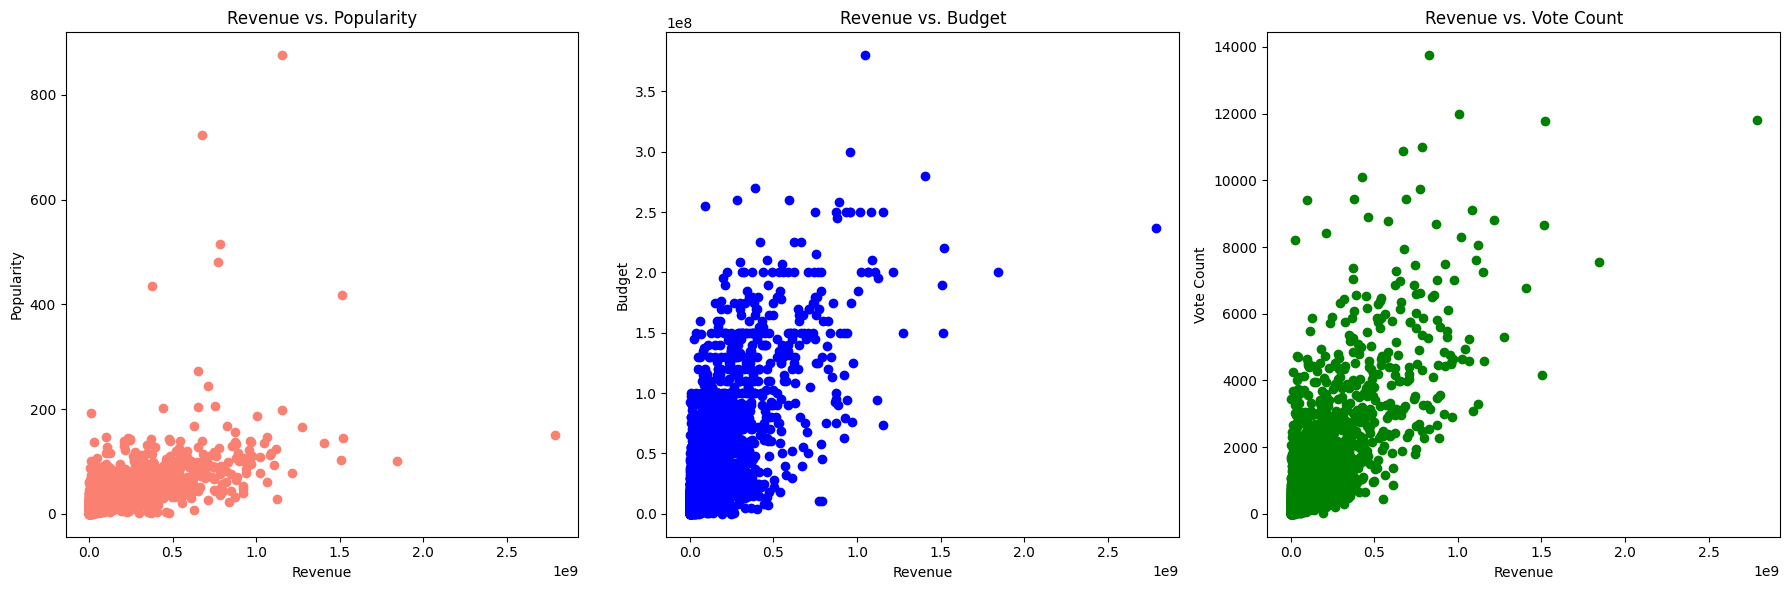

In [71]:
# Gráfiquemos las 3 variables vs. revenue
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: 'revenue' vs. 'popularity'
axes[0].scatter(df['revenue'], df['popularity'], color='salmon')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Popularity')
axes[0].set_title('Revenue vs. Popularity')

# Gráfico 2: 'revenue' vs. 'budget'
axes[1].scatter(df['revenue'], df['budget'], color='blue')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Budget')
axes[1].set_title('Revenue vs. Budget')

# Gráfico 3: 'revenue' vs. 'vote_count'
axes[2].scatter(df['revenue'], df['vote_count'], color='green')
axes[2].set_xlabel('Revenue')
axes[2].set_ylabel('Vote Count')
axes[2].set_title('Revenue vs. Vote Count')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

*Efectivamente como la correlación marca tenemos una tendencia en cada par de variables*

In [72]:
# Interpolación lineal
interpolar = df[['revenue','popularity','budget','vote_count']]
df_interpolada = interpolar.interpolate(method="linear")
prefijo = "IN_lineal_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_lineal_revenue,IN_lineal_popularity,IN_lineal_budget,IN_lineal_vote_count
id,,,,
19995,2787965087.00,150.44,237000000.00,11800.00
285,961000000.00,139.08,300000000.00,4500.00
206647,880674609.00,107.38,245000000.00,4466.00
49026,1084939099.00,112.31,250000000.00,9106.00
49529,284139100.00,43.93,260000000.00,2124.00
...,...,...,...,...
9367,2040920.00,14.27,220000.00,238.00
72766,2040920.00,0.64,9000.00,5.00
231617,2040920.00,1.44,9000.00,6.00


In [73]:
df_interpolada_2 = pd.concat([df_interpolada['IN_lineal_revenue'], interpolar], axis=1)
df_interpolada_2[df_interpolada_2['revenue'].isnull()]

,IN_lineal_revenue,revenue,popularity,budget,vote_count
id,,,,,
79698,430803520.50,NaN,2.42,27000000.00,34.00
7978,484962358.00,NaN,21.21,150000000.00,549.00
10588,217474370.50,NaN,18.25,NaN,366.00
10214,113769734.50,NaN,17.82,84000000.00,338.00
10357,117253773.50,NaN,19.84,90000000.00,376.00
...,...,...,...,...,...
67238,1232840.00,NaN,0.02,NaN,2.00
72766,2040920.00,NaN,0.64,9000.00,5.00
231617,2040920.00,NaN,1.44,NaN,6.00


In [74]:
# Interpolación Polinomial
interpolar = df[['revenue','popularity','budget','vote_count']]
df_interpolada = interpolar.interpolate(method="polynomial",order = 2)
prefijo = "IN_polin_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_polin_revenue,IN_polin_popularity,IN_polin_budget,IN_polin_vote_count
id,,,,
19995,2787965087.00,150.44,237000000.00,11800.00
285,961000000.00,139.08,300000000.00,4500.00
206647,880674609.00,107.38,245000000.00,4466.00
49026,1084939099.00,112.31,250000000.00,9106.00
49529,284139100.00,43.93,260000000.00,2124.00
...,...,...,...,...
9367,2040920.00,14.27,220000.00,238.00
72766,-25102739.42,0.64,9000.00,5.00
231617,128370828.02,1.44,25096077.46,6.00


*La interpolación polinomial no has a devuelto valores negativos que no son aceptables para este campo, por lo que desistimos de continuar con su uso para el análisis*

In [75]:
#Interpolación nearest
interpolar = df[['revenue','popularity','budget','vote_count']]
df_interpolada = interpolar.interpolate(method="nearest")
prefijo = "IN_nearest_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_nearest_revenue,IN_nearest_popularity,IN_nearest_budget,IN_nearest_vote_count
id,,,,
19995,2787965087.00,150.44,237000000.00,11800.00
285,961000000.00,139.08,300000000.00,4500.00
206647,880674609.00,107.38,245000000.00,4466.00
49026,1084939099.00,112.31,250000000.00,9106.00
49529,284139100.00,43.93,260000000.00,2124.00
...,...,...,...,...
9367,2040920.00,14.27,220000.00,238.00
72766,63327201.00,0.64,9000.00,5.00
231617,5483299.00,1.44,5500000.00,6.00


In [76]:
df_interpolada_4 = pd.concat([df_interpolada['IN_nearest_revenue'], interpolar], axis=1)
df_interpolada_4[df_interpolada_4['revenue'].isnull()]

,IN_nearest_revenue,revenue,popularity,budget,vote_count
id,,,,,
79698,9627492.00,NaN,2.42,27000000.00,34.00
7978,73276047.00,NaN,21.21,150000000.00,549.00
10588,61347797.00,NaN,18.25,NaN,366.00
10214,58000000.00,NaN,17.82,84000000.00,338.00
10357,42105111.00,NaN,19.84,90000000.00,376.00
...,...,...,...,...,...
67238,96070507.00,NaN,0.02,NaN,2.00
72766,63327201.00,NaN,0.64,9000.00,5.00
231617,5483299.00,NaN,1.44,NaN,6.00


In [77]:
# Junto toda la interpolacion
df['IN_lineal_revenue'] = df_interpolada_2['IN_lineal_revenue']
df['IN_nearest_revenue'] = df_interpolada_4['IN_nearest_revenue']
df['revenue_Vacio'] = df['revenue'].isnull()

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Revenue vs Vote_Count')

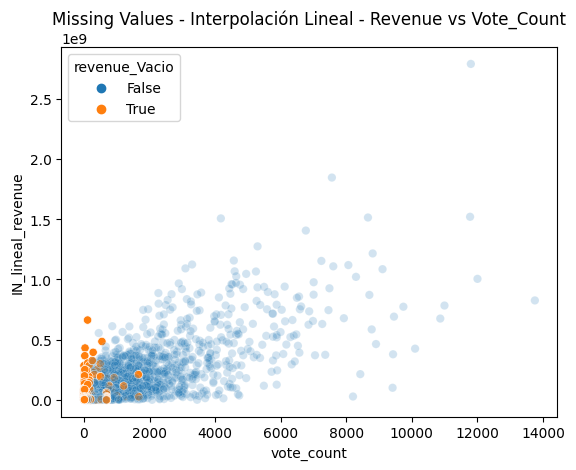

In [78]:
# Gráfiquemos para ver como quedarian los datos a reemplazar
valores_alpha = np.where(df['revenue_Vacio'] == True,1,0.2)
valores_tamanio = np.where(df['revenue_Vacio'] == True,3,1)
plt.figure()
sns.scatterplot(data = df,
                x = 'vote_count',
                y = 'IN_lineal_revenue',
                hue = 'revenue_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Revenue vs Vote_Count')

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Revenue vs Budget')

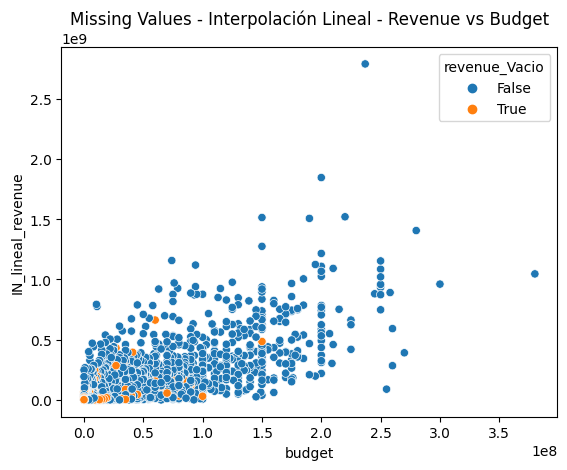

In [79]:
plt.figure()
sns.scatterplot(data = df,
                x = 'budget',
                y = 'IN_lineal_revenue',
                hue = 'revenue_Vacio')
plt.title('Missing Values - Interpolación Lineal - Revenue vs Budget')

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Revenue vs Popularity')

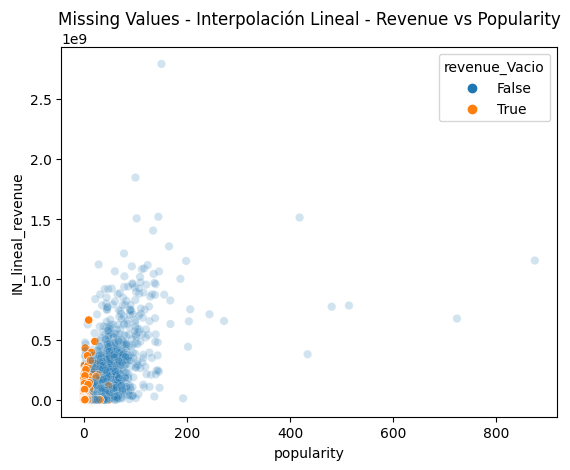

In [80]:
plt.figure()
sns.scatterplot(data = df,
                x = 'popularity',
                y = 'IN_lineal_revenue',
                hue = 'revenue_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Revenue vs Popularity')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Revenue vs Vote_Count')

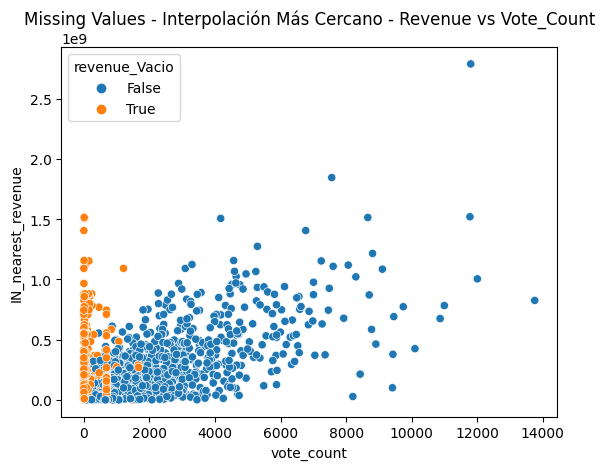

In [81]:
plt.figure()
sns.scatterplot(data = df,
                x = 'vote_count',
                y = 'IN_nearest_revenue',
                hue = 'revenue_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Revenue vs Vote_Count')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Revenue vs Popularity')

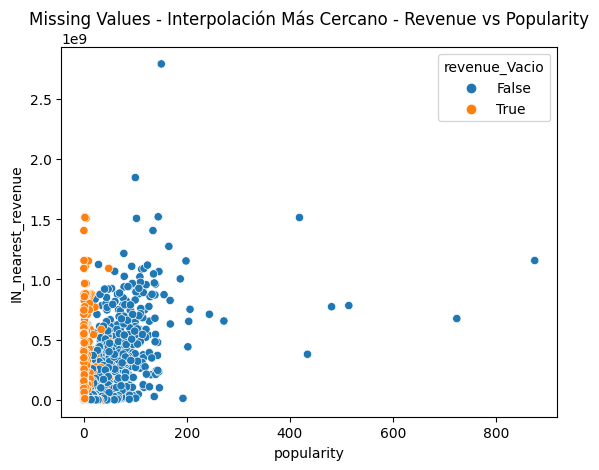

In [82]:
plt.figure()
sns.scatterplot(data = df,
                x = 'popularity',
                y = 'IN_nearest_revenue',
                hue = 'revenue_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Revenue vs Popularity')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Revenue vs Budget')

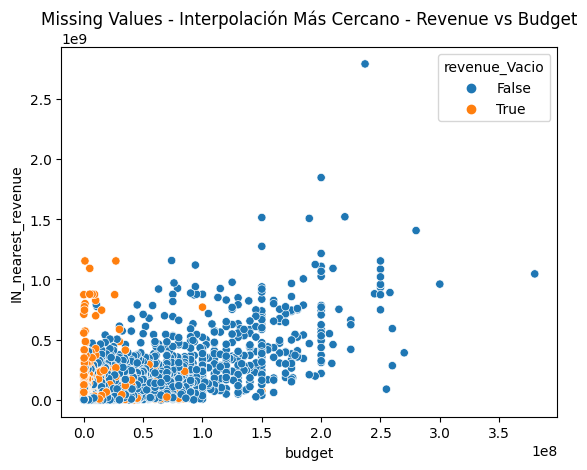

In [83]:
plt.figure()
sns.scatterplot(data = df,
                x = 'budget',
                y = 'IN_nearest_revenue',
                hue = 'revenue_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Revenue vs Budget')

*De los gráficos determinamos que el la interpolación lineal es la mejor candidata a corregir nuestros valores en cero para revenue, por lo que reemplazaremos IN_lineal_revenue por revenue en nuestro dataset*

In [84]:
# Realizamos el reemplazo antes de proceder a hacer la interpolación para budget
df['revenue'] = df['IN_lineal_revenue']


## Interpolación para *budget*

In [85]:
#Veamos la correlación con Budget
correlaciones_budget = abs(df[['budget','revenue','popularity','runtime','vote_average','vote_count']].corr(method='pearson')['budget'])
df[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr(method='pearson')['budget'][(correlaciones_budget < 1) & (correlaciones_budget > 0.35)].sort_values(ascending=False)

revenue      0.71
vote_count   0.55
popularity   0.46
Name: budget, dtype: float64

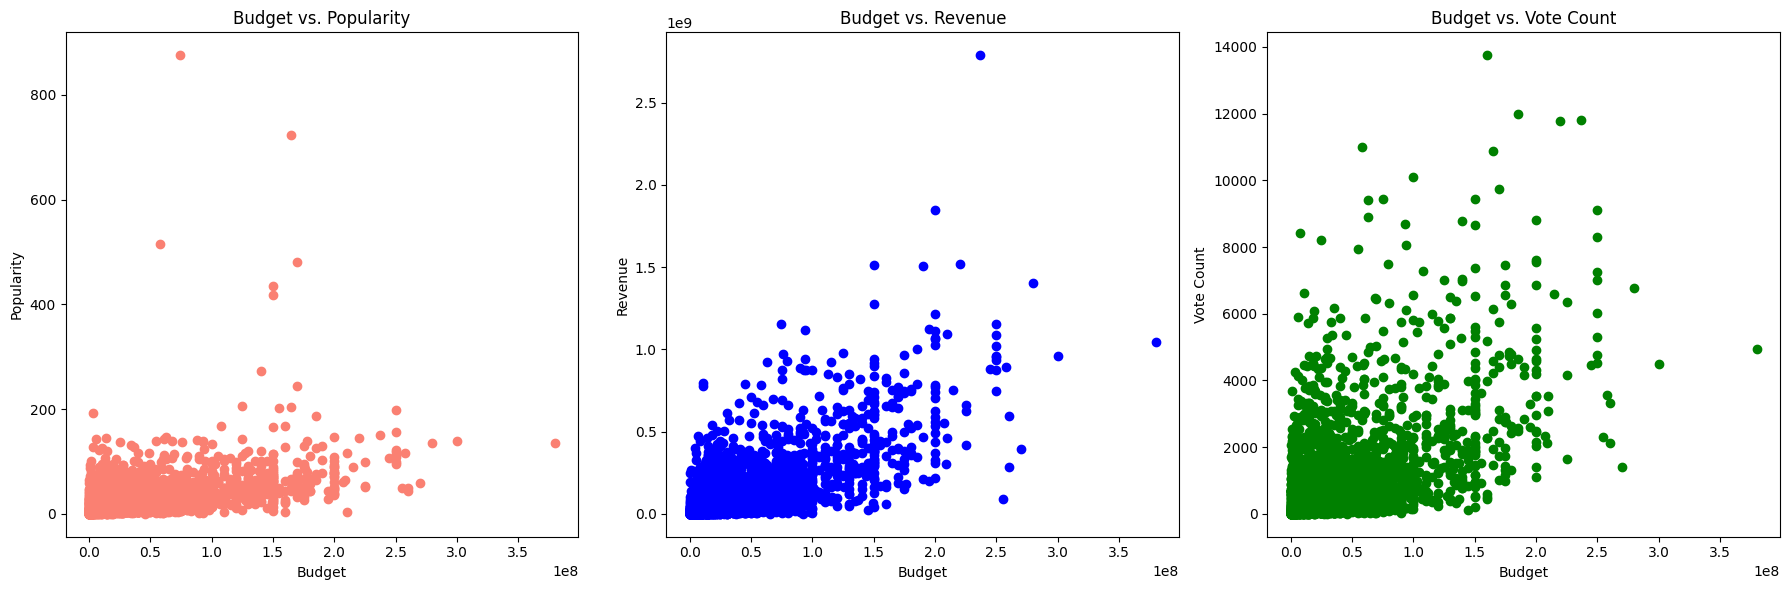

In [86]:
# Grafiquemos las variables con mejor correlación
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: 'budget' vs. 'popularity'
axes[0].scatter(df['budget'], df['popularity'], color='salmon')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Popularity')
axes[0].set_title('Budget vs. Popularity')

# Gráfico 2: 'budget' vs. 'revenue'
axes[1].scatter(df['budget'], df['revenue'], color='blue')
axes[1].set_xlabel('Budget')
axes[1].set_ylabel('Revenue')
axes[1].set_title('Budget vs. Revenue')

# Gráfico 3: 'budget' vs. 'vote_count'
axes[2].scatter(df['budget'], df['vote_count'], color='green')
axes[2].set_xlabel('Budget')
axes[2].set_ylabel('Vote Count')
axes[2].set_title('Budget vs. Vote Count')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

*Nuevamente se ve una tendencia en cada gráfico, veamos la interpolación para esta variable*

In [87]:
# Interpolación lineal
interpolar = df[['budget','popularity','revenue','vote_count']]
df_interpolada = interpolar.interpolate(method="linear")
prefijo = "IN_lineal_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_lineal_budget,IN_lineal_popularity,IN_lineal_revenue,IN_lineal_vote_count
id,,,,
19995,237000000.00,150.44,2787965087.00,11800.00
285,300000000.00,139.08,961000000.00,4500.00
206647,245000000.00,107.38,880674609.00,4466.00
49026,250000000.00,112.31,1084939099.00,9106.00
49529,260000000.00,43.93,284139100.00,2124.00
...,...,...,...,...
9367,220000.00,14.27,2040920.00,238.00
72766,9000.00,0.64,2040920.00,5.00
231617,9000.00,1.44,2040920.00,6.00


In [88]:
df_interpolada_5 = pd.concat([df_interpolada['IN_lineal_budget'], interpolar], axis=1)
df_interpolada_5[df_interpolada_5['budget'].isnull()]

,IN_lineal_budget,budget,popularity,revenue,vote_count
id,,,,,
10588,113500000.00,NaN,18.25,217474370.50,366.00
77953,91000000.00,NaN,16.46,104907746.00,578.00
258509,97500000.00,NaN,27.87,233755553.00,428.00
51052,87500000.00,NaN,19.84,150704196.00,333.00
16858,85000000.00,NaN,5.16,37823676.00,85.00
...,...,...,...,...,...
124606,10250.00,NaN,0.92,343320.00,1.00
67238,113500.00,NaN,0.02,1232840.00,2.00
231617,9000.00,NaN,1.44,2040920.00,6.00


In [89]:
# Interpolación Polinomial
interpolar = df[['budget','popularity','revenue','vote_count']]
df_interpolada = interpolar.interpolate(method="polynomial",order = 2)
prefijo = "IN_polin_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_polin_budget,IN_polin_popularity,IN_polin_revenue,IN_polin_vote_count
id,,,,
19995,237000000.00,150.44,2787965087.00,11800.00
285,300000000.00,139.08,961000000.00,4500.00
206647,245000000.00,107.38,880674609.00,4466.00
49026,250000000.00,112.31,1084939099.00,9106.00
49529,260000000.00,43.93,284139100.00,2124.00
...,...,...,...,...
9367,220000.00,14.27,2040920.00,238.00
72766,9000.00,0.64,2040920.00,5.00
231617,25096077.46,1.44,2040920.00,6.00


In [90]:
df_interpolada_6 = pd.concat([df_interpolada['IN_polin_budget'], interpolar], axis=1)
df_interpolada_6[df_interpolada_6['budget'].isnull()]

,IN_polin_budget,budget,popularity,revenue,vote_count
id,,,,,
10588,52961575.55,NaN,18.25,217474370.50,366.00
77953,-84195724.61,NaN,16.46,104907746.00,578.00
258509,187586862.65,NaN,27.87,233755553.00,428.00
51052,-8664639.33,NaN,19.84,150704196.00,333.00
16858,45595738.50,NaN,5.16,37823676.00,85.00
...,...,...,...,...,...
124606,39300271.27,NaN,0.92,343320.00,1.00
67238,31075532.55,NaN,0.02,1232840.00,2.00
231617,25096077.46,NaN,1.44,2040920.00,6.00


*Nuevamente la aparición de negativos hace que desestimemos esta tipo de interpolación para el campo budget*

In [91]:
interpolar = df[['budget','popularity','revenue','vote_count']]
df_interpolada = interpolar.interpolate(method="nearest")
prefijo = "IN_nearest_"
df_interpolada = df_interpolada.add_prefix(prefijo)
df_interpolada

,IN_nearest_budget,IN_nearest_popularity,IN_nearest_revenue,IN_nearest_vote_count
id,,,,
19995,237000000.00,150.44,2787965087.00,11800.00
285,300000000.00,139.08,961000000.00,4500.00
206647,245000000.00,107.38,880674609.00,4466.00
49026,250000000.00,112.31,1084939099.00,9106.00
49529,260000000.00,43.93,284139100.00,2124.00
...,...,...,...,...
9367,220000.00,14.27,2040920.00,238.00
72766,9000.00,0.64,2040920.00,5.00
231617,5500000.00,1.44,2040920.00,6.00


In [92]:
df_interpolada_7 = pd.concat([df_interpolada['IN_nearest_budget'], interpolar], axis=1)
df_interpolada_7[df_interpolada_7['budget'].isnull()]

,IN_nearest_budget,budget,popularity,revenue,vote_count
id,,,,,
10588,60000000.00,NaN,18.25,217474370.50,366.00
77953,80000000.00,NaN,16.46,104907746.00,578.00
258509,180000000.00,NaN,27.87,233755553.00,428.00
51052,30000000.00,NaN,19.84,150704196.00,333.00
16858,70000000.00,NaN,5.16,37823676.00,85.00
...,...,...,...,...,...
124606,30000000.00,NaN,0.92,343320.00,1.00
67238,2902660.00,NaN,0.02,1232840.00,2.00
231617,5500000.00,NaN,1.44,2040920.00,6.00


In [93]:
# Junto toda la interpolacion
df['IN_lineal_budget'] = df_interpolada_5['IN_lineal_budget']
df['IN_nearest_budget'] = df_interpolada_7['IN_nearest_budget']
df['budget_Vacio'] = df['budget'].isnull()

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Budget vs Vote_Count')

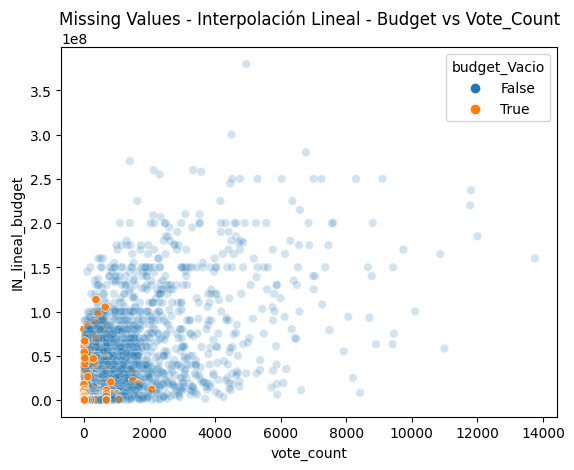

In [94]:
# Grafiquemos para ver la interpolación 
valores_alpha = np.where(df['budget_Vacio'] == True,1,0.2)
valores_tamanio = np.where(df['budget_Vacio'] == True,3,1)
plt.figure()
sns.scatterplot(data = df,
                x = 'vote_count',
                y = 'IN_lineal_budget',
                hue = 'budget_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Budget vs Vote_Count')

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Budget vs Revenue')

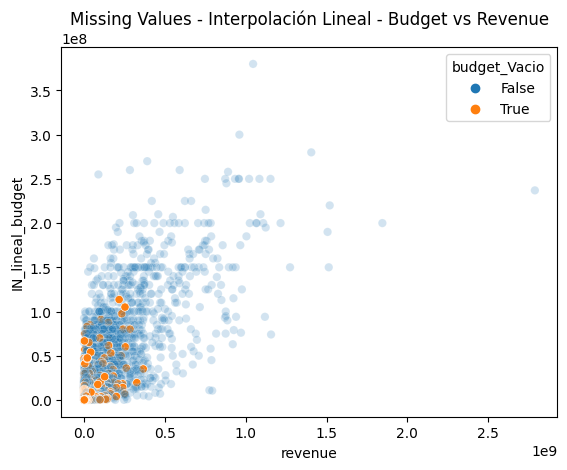

In [95]:
plt.figure()
sns.scatterplot(data = df,
                x = 'revenue',
                y = 'IN_lineal_budget',
                hue = 'budget_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Budget vs Revenue')

Text(0.5, 1.0, 'Missing Values - Interpolación Lineal - Budget vs Popularity')

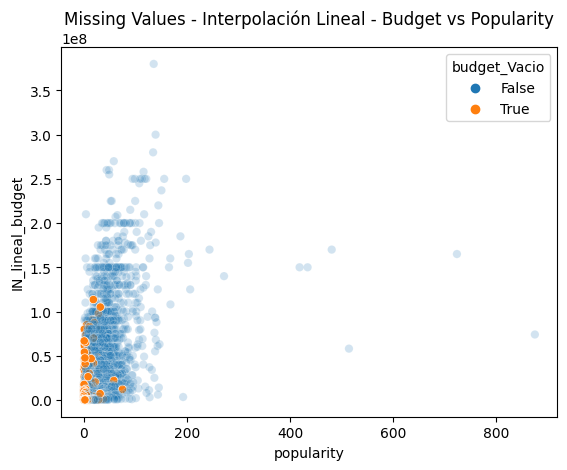

In [96]:
plt.figure()
sns.scatterplot(data = df,
                x = 'popularity',
                y = 'IN_lineal_budget',
                hue = 'budget_Vacio',
                alpha = valores_alpha)
plt.title('Missing Values - Interpolación Lineal - Budget vs Popularity')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Budget vs Vote_Count')

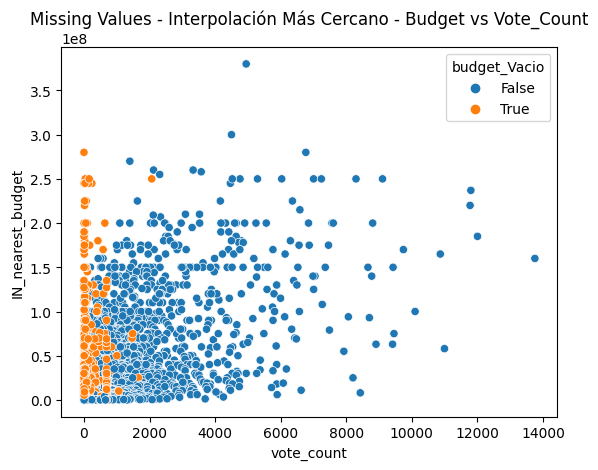

In [97]:
plt.figure()
sns.scatterplot(data = df,
                x = 'vote_count',
                y = 'IN_nearest_budget',
                hue = 'budget_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Budget vs Vote_Count')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Budget vs Popularity')

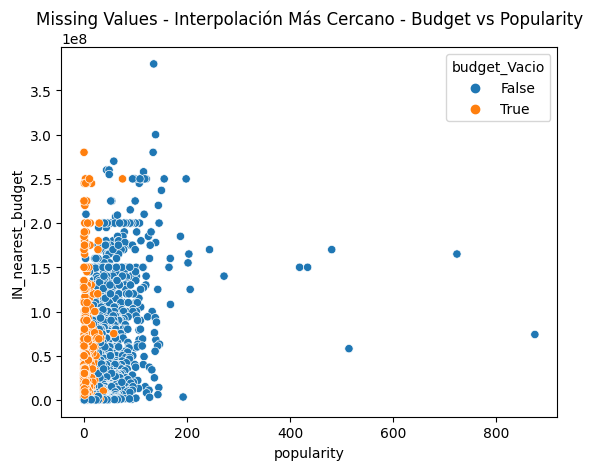

In [98]:
plt.figure()
sns.scatterplot(data = df,
                x = 'popularity',
                y = 'IN_nearest_budget',
                hue = 'budget_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Budget vs Popularity')

Text(0.5, 1.0, 'Missing Values - Interpolación Más Cercano - Budget vs Revenue')

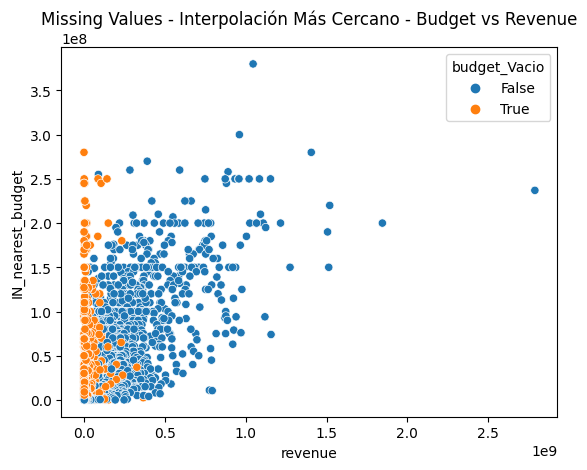

In [99]:
plt.figure()
sns.scatterplot(data = df,
                x = 'revenue',
                y = 'IN_nearest_budget',
                hue = 'budget_Vacio')
plt.title('Missing Values - Interpolación Más Cercano - Budget vs Revenue')

*Nuevamente de este último análisis determinamos usar la interpolación lineal para reemplazar la columna budget*

In [100]:
df['budget'] = df['IN_lineal_budget']

# Variable target 
*Variable target* ***revenue*** / ***popularity***

*Analicemos nuestra variable target y nuestra target alternativa*

In [101]:
# Analicemos las variables target
variable_target = df['revenue']
variable_target.describe()

count         4799.00
mean      91248250.82
std      161328695.11
min              5.00
25%        8414448.50
50%       33526835.00
75%      101674320.50
max     2787965087.00
Name: revenue, dtype: float64

In [102]:
variable_target_alternativa =df['popularity']
variable_target_alternativa.describe()

count   4799.00
mean      21.51
std       31.82
min        0.00
25%        4.69
50%       12.93
75%       28.35
max      875.58
Name: popularity, dtype: float64

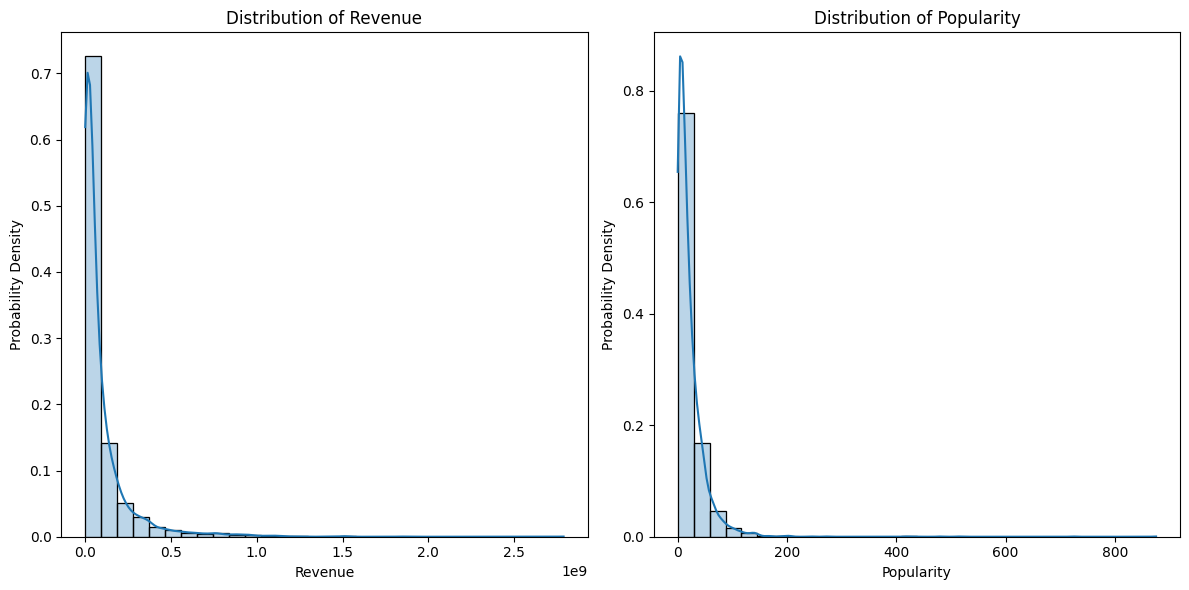

In [103]:
# Grafiquemos ambas variables
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: 'revenue'
sns.histplot(data=df, x='revenue', bins=30, alpha=0.3, kde=True, stat='probability', ax=axes[0])
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Probability Density')
axes[0].set_title('Distribution of Revenue')

# Gráfico 2: 'popularity'
sns.histplot(data=df, x='popularity', bins=30, alpha=0.3, kde=True, stat='probability', ax=axes[1])
axes[1].set_xlabel('Popularity')
axes[1].set_ylabel('Probability Density')
axes[1].set_title('Distribution of Popularity')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [104]:
# Correlación 
df[['revenue','popularity','budget','runtime','vote_average','vote_count']].corr(method='pearson')

,revenue,popularity,budget,runtime,vote_average,vote_count
revenue,1.00,0.63,0.72,0.25,0.19,0.76
popularity,0.63,1.00,0.49,0.22,0.28,0.77
budget,0.72,0.49,1.00,0.27,0.04,0.58
runtime,0.25,0.22,0.27,1.00,0.36,0.27
vote_average,0.19,0.28,0.04,0.36,1.00,0.34
vote_count,0.76,0.77,0.58,0.27,0.34,1.00


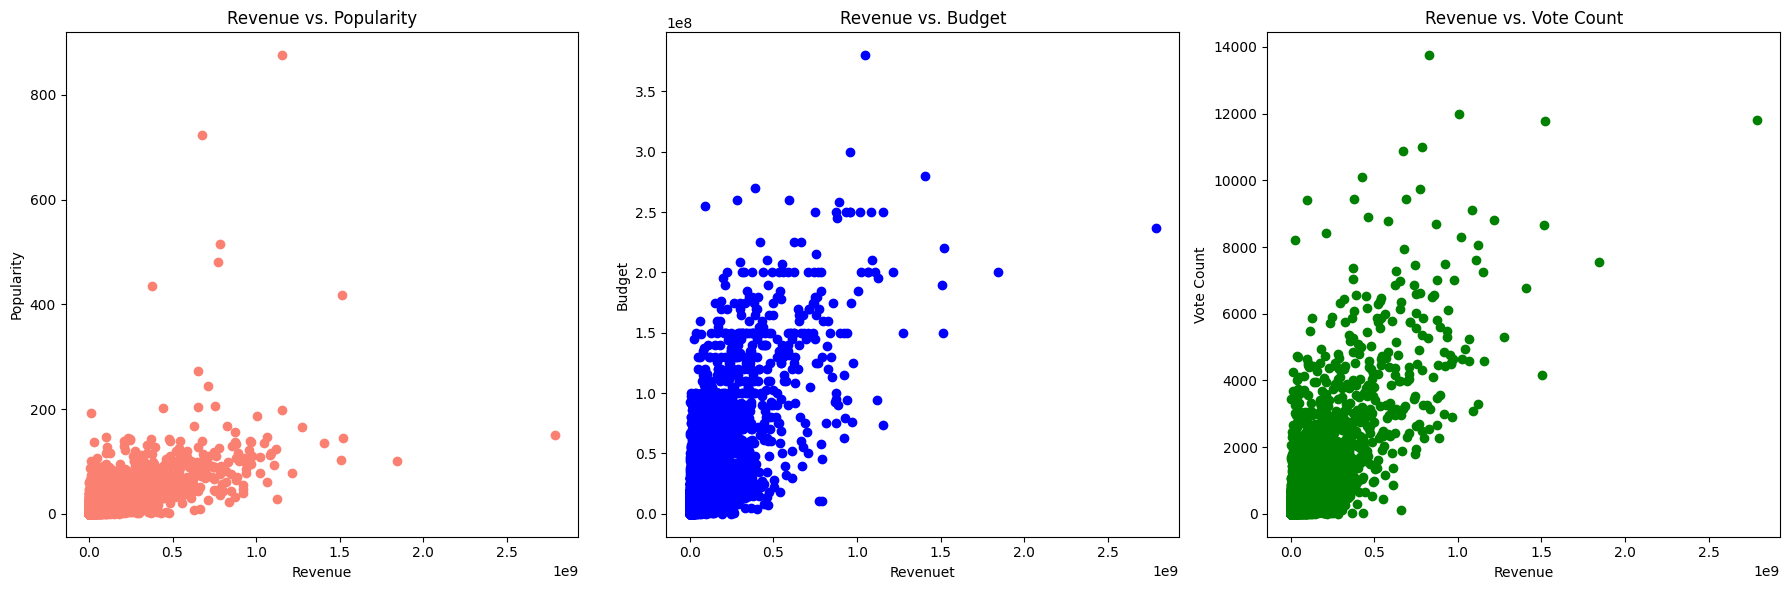

In [105]:
# Grafiquemos la variables con mayor correlación contra revenue
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: 'revenue' vs. 'popularity'
axes[0].scatter(df['revenue'], df['popularity'], color='salmon')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Popularity')
axes[0].set_title('Revenue vs. Popularity')

# Gráfico 2: 'revenue' vs. 'budget'
axes[1].scatter(df['revenue'], df['budget'], color='blue')
axes[1].set_xlabel('Revenuet')
axes[1].set_ylabel('Budget')
axes[1].set_title('Revenue vs. Budget')

# Gráfico 3: 'revenue' vs. 'vote_count'
axes[2].scatter(df['revenue'], df['vote_count'], color='green')
axes[2].set_xlabel('Revenue')
axes[2].set_ylabel('Vote Count')
axes[2].set_title('Revenue vs. Vote Count')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Outliers
*Veamos los outliers para la varible target revenue a través de los distintos métodos*

In [106]:
# Metodo IQR 
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)
rango_intercuartilico = tercer_cuartil - primer_cuartil

# Limites: 
limite_inf = primer_cuartil - (1.5 * rango_intercuartilico)
limite_sup = tercer_cuartil + (1.5 * rango_intercuartilico)

print(limite_inf,limite_sup)

-131475359.5 241564128.5


In [107]:
# Identifico outliers: 
df['Otlier_IQR'] = np.where((df['revenue'] < limite_inf) | (df['revenue'] > limite_sup),1,0)
df['Otlier_IQR'].value_counts()

Otlier_IQR
0    4332
1     467
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers - Metodo IQR')

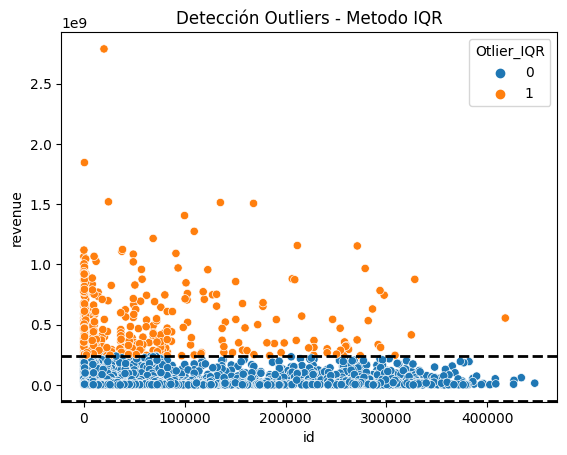

In [108]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'id',
                y = 'revenue',
               hue = 'Otlier_IQR')
plt.axhline(y = limite_inf, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo IQR')

In [109]:
# Metodo Z-Score 
media = variable_target.mean()
desvio = variable_target.std()
valores_z = (variable_target - media)/desvio

# Limites: 
limite_inf = (-3)
limite_sup = 3

print(valores_z)

id
19995    16.72
285       5.39
206647    4.89
49026     6.16
49529     1.20
          ... 
9367     -0.55
72766    -0.55
231617   -0.55
126186   -0.55
25975    -0.55
Name: revenue, Length: 4799, dtype: float64


In [110]:
# Identifico outliers: 
df['Otlier_ZScore'] = np.where((valores_z < limite_inf) | (valores_z > limite_sup),1,0)
df['Otlier_ZScore'].value_counts()

Otlier_ZScore
0    4683
1     116
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers - Metodo Z Score')

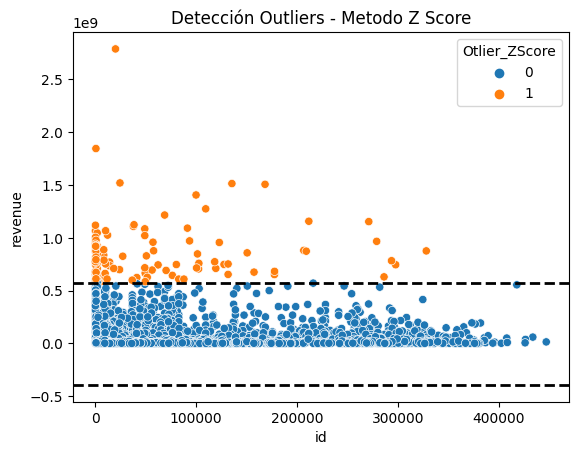

In [111]:
limite_inf_tr = limite_inf * desvio + media
limite_sup_tr = limite_sup * desvio + media

# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'id',
                y = 'revenue',
               hue = 'Otlier_ZScore')
plt.axhline(y = limite_inf_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo Z Score')

In [112]:
# Metodo Distancia Media 
media = variable_target.mean()
MAD = sum(abs(variable_target - media)) / variable_target.count()

# Limites: 
limite_inf = media - (3 * MAD)
limite_sup = media + (3 * MAD)

print(MAD,limite_inf,limite_sup)

95179379.35212809 -194289887.2350673 376786388.8777012


In [113]:
# Identifico outliers: 
df['Otlier_DistanciaMedia'] = np.where((df['revenue'] < limite_inf) | (df['revenue'] > limite_sup),1,0)
df['Otlier_DistanciaMedia'].value_counts()

Otlier_DistanciaMedia
0    4568
1     231
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers - Metodo Distancia de la Media')

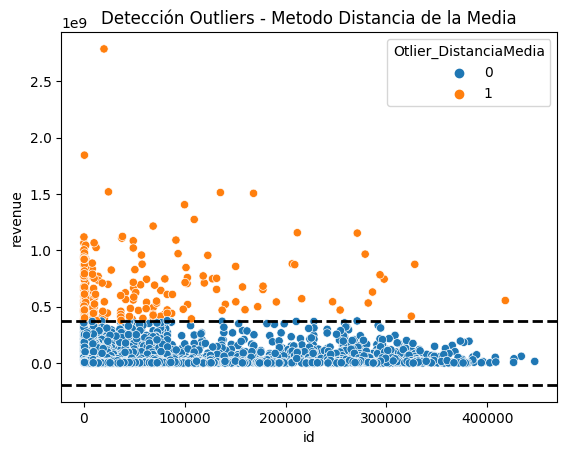

In [114]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'id',
                y = 'revenue',
               hue = 'Otlier_DistanciaMedia')
plt.axhline(y = limite_inf, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers - Metodo Distancia de la Media')

*Tras usar los 3 métodos los resultados son congruentes entre si, por lo que cualquiera de esto metodos es viable para excluir outliers del análisis*

## Análisis Multivariado Outliers
*Veamos los outliers con un dos variables, para eso usemos vote_count que tiene la mayor correlación con revenue.*

In [115]:
# Confirmemos la correlación 
df[['revenue','vote_count']].corr(method='pearson')

,revenue,vote_count
revenue,1.00,0.76
vote_count,0.76,1.00


In [116]:
# Metodo: Distancia Media Multivariado
# Defino función: 
def outlier_euclideano_d(x,cutoff):
  # x: dataframe con valors numericos normalizados 
  result_ = pd.Series([0] * len(x.iloc[:,1]))
  data_mean = x.mean() # media de los datos_
  dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Distancia euclideana 
  dist_mean = dist.mean() #media de las distancia
  dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score para las distancias
  result_[((dist_zscore > 3))] = 1
  return result_

In [117]:
# Aplicamos la funcion
df['Outlier_DistanciaMedia_Mult'] = outlier_euclideano_d(df[['vote_count','revenue']].reset_index(drop=True),3)
df.head()

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,...,IN_lineal_revenue,IN_nearest_revenue,revenue_Vacio,IN_lineal_budget,IN_nearest_budget,budget_Vacio,Otlier_IQR,Otlier_ZScore,Otlier_DistanciaMedia,Outlier_DistanciaMedia_Mult
id,,,,,,,,,,,,,,,,,,,,,
19995,237000000.00,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,...,2787965087.00,2787965087.00,False,237000000.00,237000000.00,False,1,1,1,NaN
285,300000000.00,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,...,961000000.00,961000000.00,False,300000000.00,300000000.00,False,1,1,1,0.00
206647,245000000.00,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,...,880674609.00,880674609.00,False,245000000.00,245000000.00,False,1,1,1,NaN
49026,250000000.00,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,...,1084939099.00,1084939099.00,False,250000000.00,250000000.00,False,1,1,1,NaN
49529,260000000.00,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.93,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,...,284139100.00,284139100.00,False,260000000.00,260000000.00,False,1,0,0,NaN


Text(0.5, 1.0, 'Detección Outliers - Metodo Distancia de la Media - Multivariado')

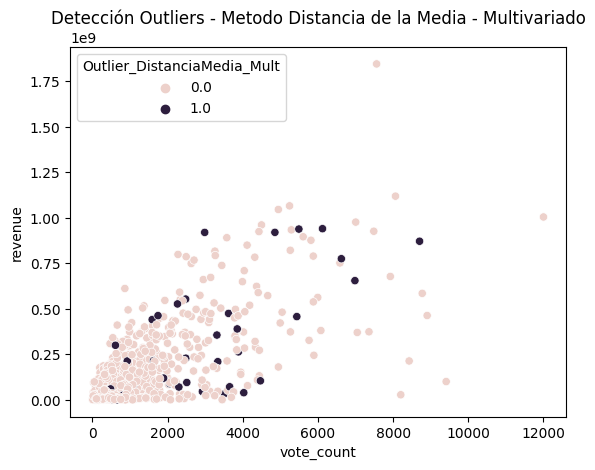

In [118]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = 'vote_count',
                y = 'revenue',
               hue = 'Outlier_DistanciaMedia_Mult')
plt.title('Detección Outliers - Metodo Distancia de la Media - Multivariado')

# Componentes Principales

In [119]:
# Selecciono variables que voy a unificar
df_PCA = df[['budget','popularity','revenue','vote_average','vote_count']]
df_PCA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 19995 to 25975
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4799 non-null   float64
 1   popularity    4799 non-null   float64
 2   revenue       4799 non-null   float64
 3   vote_average  4799 non-null   float64
 4   vote_count    4799 non-null   float64
dtypes: float64(5)
memory usage: 225.0 KB


In [120]:
# Extraer la matriz de características
X = df_PCA.values

# Crear un objeto PCA
pca = PCA(n_components = 2)

# Ajustar el modelo PCA a los datos
pca.fit(X)

# Obtener las componentes principales
componentes_principales = pca.transform(X)

# Crear un nuevo DataFrame con las componentes principales
df_PCA_final = pd.DataFrame(data = componentes_principales)
df_PCA_final.head()

,0,1
0,2689538477.97,284550205.11
1,903966618.95,-107245105.54
2,815031679.16,-67650346.75
3,1016842496.28,-35691373.40
4,231006087.49,-190099200.46


In [121]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)

# Sigo el paso a paso
pca = PCA(n_components = 2)

pca.fit(X)

componentes_principales = pca.transform(X)

df_PCA_final_2 = pd.DataFrame(data = componentes_principales)
prefijo = "PC_"
df_PCA_final_2 = df_PCA_final_2.add_prefix(prefijo)
df_PCA_final_2.head()

,PC_0,PC_1
0,17.65,3.12
1,9.25,2.44
2,7.77,2.44
3,10.79,1.20
4,4.06,2.44


Text(0.5, 1.0, 'Gráfico de Dispersión de las Dos Primeras Componentes Principales')

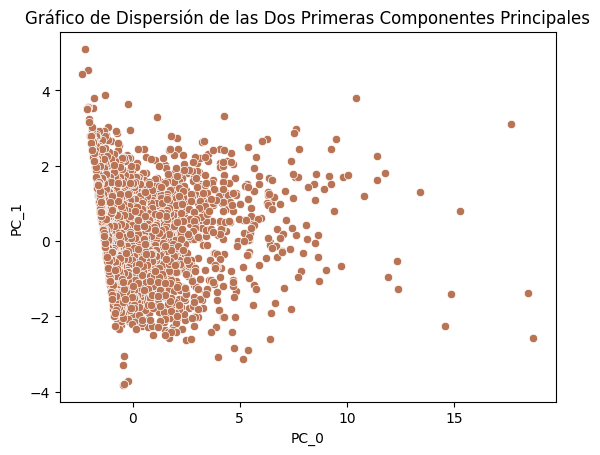

In [126]:
# Grafico de dispersión
plt.figure()
sns.scatterplot(data = df_PCA_final_2,
                x = 'PC_0',
                y = 'PC_1',
                color='#b97455')
plt.title('Gráfico de Dispersión de las Dos Primeras Componentes Principales')

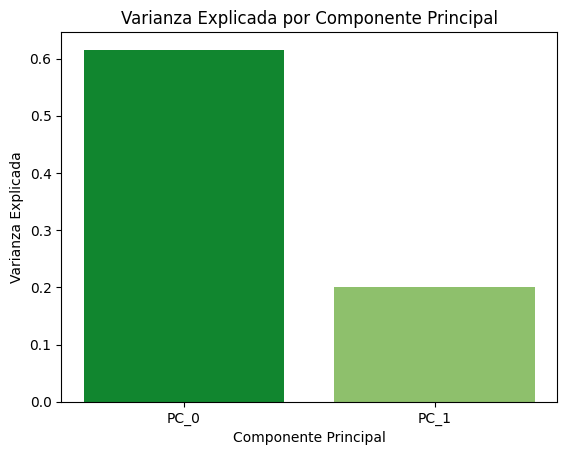

In [124]:
# Visualizar la varianza explicada por cada componente principal en un gráfico de barras
varianza_explicada = pca.explained_variance_ratio_
componentes = df_PCA_final_2.columns

#Paleta de colores para las barras
custom_colors = ['#11862f', '#8ec06c']


plt.bar(componentes, 
        varianza_explicada,
        color=custom_colors)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()